Customer churn/customer retention/customer turnover/customer defection merupakan kejadian dimana perusahaan kehilangan klien atau konsumen. Banyak perusahaan menggunakan customer churn sebagai key business metrics karena menambah customer baru diperlukan biaya lebih banyak dibandingkan mempertahankan customer lama. Perusahaan yang menggunakan indikator ini yakni Perusahaan Telecom. Perusahaan Telecom ingin mengetahui kebiasaan perilaku customer churn (customer yang pergi dalam sebulan terakhir) berdasarkan berbagai aspek. Tujuan dari project ini adalah memprediksi customer churn untuk mempertahankan customer Perusahaan Telecom. Dataset ini memberikan analisis untuk memahami karakteristik yang menyebabkan customer churn, pengembangan model untuk memprediksi apakah customer kemungkinan besar akan meninggalkan bisnis, dan evaluasi beberapa strategi untuk mencegah customer churn.

## Import Library

In [1]:
#import library
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns

## Load Datasets

In [2]:
#Load Data From Local File

#from google.colab import files
#files.upload()

In [3]:
#data=pd.read_csv("telco.csv",sep=";")
data=pd.read_csv("https://challenge2.s3.jp-tok.cloud-object-storage.appdomain.cloud/telco.csv",sep=";")

## Data Understanding

In [4]:
#See the first 5 data
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [5]:
#See the number of rows and number of columns of data
data.shape

(7043, 21)

In [6]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
#See a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.401107,64.751874
std,0.368612,24.606849,30.097858
min,0.000000,1.000000,12.000000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,120.000000,118.750000


The dataset includes information about:
+ Customers who churned — the column is called Churn
+ Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information — how long they’ve been a customer, the type of contract (month-to-month, one-year, two-years), payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers — gender, age, and if they have partners and dependents

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [8]:
#Drop duplicate value
data.drop_duplicates(inplace=True)

In [9]:
#See changes in the number of rows and columns after the duplicate value is deleted
data.shape

(7043, 21)

### Check Data Types

In [10]:
#Check Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [12]:
#merubah nilai kosong dengan isi spasi menjadi NA
data["totalcharges"]=data["totalcharges"].replace(" ",np.nan)

In [13]:
#merubah tipe data
data["totalcharges"]=data["totalcharges"].astype("float64")

In [14]:
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Check Missing Value

In [15]:
#Check the missing value
data.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

### Impute Missing value

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


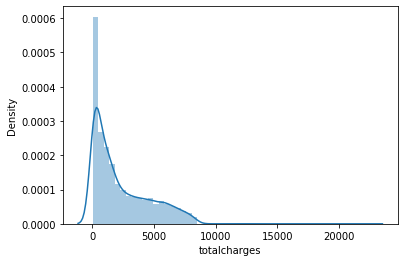

In [16]:
#Look at the distribution of the totalcharges variable with histogram and density plot
sns.distplot(data["totalcharges"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


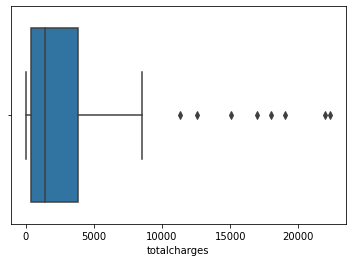

In [17]:
#Look at the distribution of the totalcharges variable with boxplot
sns.boxplot(data["totalcharges"])

In [18]:
#Because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill=data["totalcharges"].median()
data["totalcharges"]=data["totalcharges"].fillna(fill)

In [19]:
#Check missing value after imputation
data.isnull().sum()

customerid          0
region              0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

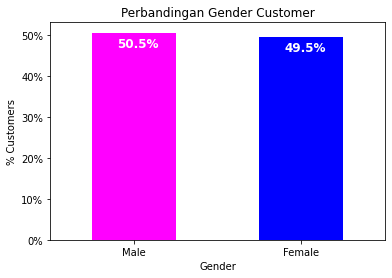

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
colors = ['magenta','blue']
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Perbandingan Gender Customer')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', 
            fontsize=12, 
            color='white', 
            weight = 'bold')

Text(0.5, 1.0, '% of Customer Churn')

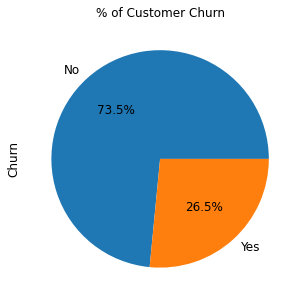

In [21]:
ax = (data['churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Customer Churn', fontsize = 12)

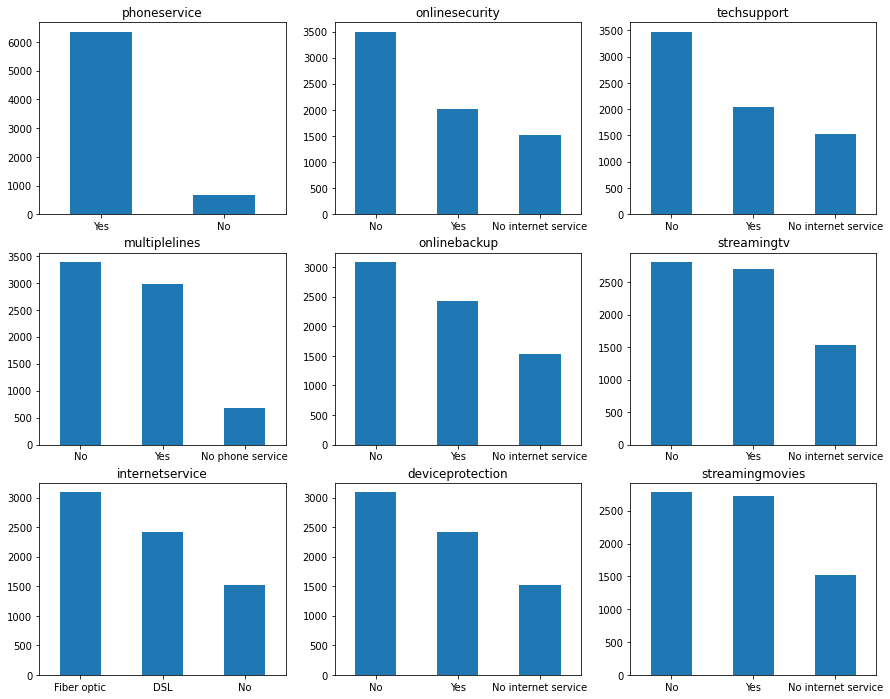

In [22]:
services = ['phoneservice','multiplelines','internetservice','onlinesecurity',
           'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### Outlier Detection

In [23]:
#Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [24]:
#Check Outlier on the Tenure variable
outlier(data["tenure"])

Number of Outlier 0


In [25]:
#Check Outlier on the monthlycharges variable
outlier(data["monthlycharges"])

Number of Outlier 0


In [26]:
#Check Outlier on the totalcharges variable
outlier(data["totalcharges"])

Number of Outlier 8
Outlier observation row:
7024
7025
7026
7027
7028
7029
7030
7031


In [27]:
#See observation outliers on the totalcharges variable
Q1=data["totalcharges"].quantile(0.25)
Q3=data["totalcharges"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["totalcharges"]>upper_range),:]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [28]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"]>upper_range),"totalcharges"]=upper_range
data.loc[(data["totalcharges"]<lower_range),"totalcharges"]=lower_range

In [29]:
#Check outlier after replace with upper and lower bound 
outlier(data["totalcharges"])

Number of Outlier 0


### Handle Inconsistent Data

In [30]:
#Replace "No Internet Service" with "No"
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols1 :
    data[i]  =data[i].str.strip()
    data[i]  = data[i].replace({'No internet service' : 'No'})

#Replace "No Phone Service" with "No"
replace_cols2 = ['multiplelines']
for i in replace_cols2 :
    data[i]  =data[i].str.strip()
    data[i]  = data[i].replace({'No phone service' : 'No'})

# Feature Enginering

### Binning or Discretization Variable

In [31]:
#Binning tenure variables become categorical variables 
from sklearn.preprocessing import KBinsDiscretizer

scaler=KBinsDiscretizer(n_bins=[5],encode="ordinal",strategy='quantile')
data[["tenure"]]=scaler.fit_transform(data[["tenure"]])

In [32]:
#Check Tenure Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Encoding Variables

In [33]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['customerid']
target_col = ["churn"]
cat_cols   = data.nunique()[data.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi value columns
data2=pd.get_dummies(data = data,columns = multi_cols,drop_first=False)
data3=pd.get_dummies(data = data,columns = multi_cols,drop_first=True)

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaling_col=['monthlycharges', 'totalcharges']
ss=StandardScaler()
data2[scaling_col]=ss.fit_transform(data2[scaling_col])
data3[scaling_col]=ss.fit_transform(data3[scaling_col])

## Data Partition

In [35]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train2,test2 = train_test_split(data2,test_size = .20 ,random_state = 111)
train3,test3 = train_test_split(data3,test_size = .20 ,random_state = 111)
 
cols1    = [i for i in data2.columns if i not in Id_col + target_col]
cols2    = [i for i in data3.columns if i not in Id_col + target_col]
##seperating dependent and independent variables on training and testing data
train2_X = train2[cols1]
train2_Y = train2[target_col]
test2_X  = test2[cols1]
test2_Y  = test2[target_col]

train3_X = train3[cols2]
train3_Y = train3[target_col]
test3_X  = test3[cols2]
test3_Y  = test3[target_col]

## Synthetic Minority Over-sampling Technique (SMOTE)

In [36]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 1234,k_neighbors=5)
train2_smote_X,train2_smote_Y = os.fit_sample(train2_X,train2_Y)
train2_smote_X = pd.DataFrame(data = train2_smote_X,columns=cols1)
train2_smote_Y = pd.DataFrame(data = train2_smote_Y,columns=target_col)

train3_smote_X,train3_smote_Y = os.fit_sample(train3_X,train3_Y)
train3_smote_X = pd.DataFrame(data = train3_smote_X,columns=cols2)
train3_smote_Y = pd.DataFrame(data = train3_smote_Y,columns=target_col)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [37]:
## Modeling

## Reglog

In [38]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X).fit() 
print(log_reg.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.477990
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8249
Method:                           MLE   Df Model:                           22
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3104
Time:                        18:17:18   Log-Likelihood:                -3953.9
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0170      

In [39]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.478698
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8250
Method:                           MLE   Df Model:                           21
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3094
Time:                        18:17:18   Log-Likelihood:                -3959.8
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0164      

In [40]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen","streamingtv"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.478994
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8251
Method:                           MLE   Df Model:                           20
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3090
Time:                        18:17:18   Log-Likelihood:                -3962.2
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0074      

In [41]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen","streamingtv","totalcharges"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.479257
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8252
Method:                           MLE   Df Model:                           19
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3086
Time:                        18:17:18   Log-Likelihood:                -3964.4
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0068      

In [42]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen","streamingtv","totalcharges","multiplelines"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.480704
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8253
Method:                           MLE   Df Model:                           18
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3065
Time:                        18:17:18   Log-Likelihood:                -3976.4
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0041      

In [43]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen","streamingtv","totalcharges","multiplelines","streamingmovies"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.480932
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8254
Method:                           MLE   Df Model:                           17
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3062
Time:                        18:17:19   Log-Likelihood:                -3978.3
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0014      

In [44]:
import statsmodels.api as sm 
log_reg = sm.Logit(train3_smote_Y, train3_smote_X.drop(labels=["seniorcitizen","streamingtv","totalcharges","multiplelines","streamingmovies","partner"],axis=1)).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.480932
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8272
Model:                          Logit   Df Residuals:                     8255
Method:                           MLE   Df Model:                           16
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.3062
Time:                        18:17:19   Log-Likelihood:                -3978.3
converged:                       True   LL-Null:                       -5733.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
gender                                   -0.0015      

#### Evaluation

In [45]:
pred=log_reg.predict(test3_X.drop(labels=["seniorcitizen","streamingtv","totalcharges","multiplelines","streamingmovies","partner"],axis=1))

In [46]:
pred

6842    0.537360
3576    0.744192
1206    0.672420
5037    0.554396
5131    0.290870
          ...   
6009    0.325260
1168    0.955414
619     0.920403
2001    0.295589
4104    0.151091
Length: 1409, dtype: float64

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy for Reglog on CV data: ",accuracy_score(test3_Y,np.round(pred)))

Accuracy for Reglog on CV data:  0.7444996451383961


In [48]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test3_Y, np.round(pred))
CF

array([[769, 269],
       [ 91, 280]])

In [49]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test3_Y, np.round(pred), target_names=target_names))

              precision    recall  f1-score   support

          No       0.89      0.74      0.81      1038
         Yes       0.51      0.75      0.61       371

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409



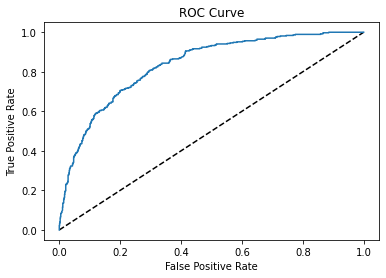

In [50]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test2_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test2_Y,np.round(pred))

0.7477823826662304

## Random Forest

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [53]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train2_smote_X, train2_smote_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [55]:
CV_rfc.cv_results_

{'mean_fit_time': array([2.00950845, 4.97555836, 9.92651963, 1.78150296, 4.36905146,
        8.7305905 , 1.42715279, 3.57554491, 7.03027598, 1.29475745,
        3.21365611, 6.38594453]),
 'mean_score_time': array([0.11467536, 0.28432647, 0.57449389, 0.11923369, 0.28662499,
        0.57540107, 0.11340785, 0.28124706, 0.55704014, 0.11573426,
        0.28398379, 0.57202538]),
 'mean_test_score': array([0.84696366, 0.84865662, 0.84865636, 0.84756857, 0.84974468,
        0.84901929, 0.85010678, 0.84793102, 0.84986505, 0.8480518 ,
        0.84986479, 0.84938148]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto'

In [56]:
CV_rfc.best_score_

0.8501067754753343

#### Evaluation

In [57]:
pred=CV_rfc.predict(test2_X)

In [58]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test2_Y,pred))

Accuracy for Random Forest on CV data:  0.7764371894960965


In [59]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test2_Y, pred)
CF

array([[884, 154],
       [161, 210]])

In [60]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test2_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1038
         Yes       0.58      0.57      0.57       371

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

